
<div style="width:100%;height:125px;text-align:center;border: 4px solid #D14949;background-color:#D14949;color:white">

<header  style="width:100%;height:100px;">
  <h1><b>Chapter </b></h1>
    <h4></h4>
</header>

<div> 



<div style="position: relative;height:100px;">
    
<div style="width:300px;position:absolute;left: auto;border: 4px solid white;background-color:#D14949;color:white">
    <header></header>
    <a href="#Forward_propagation"style="padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>classifies movie reviews</b></h4>
      </a>
 </div>
    
 <div style="width:300px;position:absolute;left: 305px;border:4px;border: 4px solid white;background-color:#D14949;color:white">
    <header></header>
    <a href="#backward_propagation"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Explore data</b></h4>
      </a>
     
  </div>
    <div  style="width:300px;position:absolute;left: 610px;border:4px;border: 4px solid white;background-color:#D14949;color:white">
    <header></header>
    <a href="#list"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>build Model </b></h4>
      </a>
        </div>
​
    
   <div  style="width:300px;position:absolute;left: 915px;border:4px;border: 4px solid white;background-color:#D14949;color:white">
    <header></header>
    <a href="#list"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Plus Theory</b></h4>
      </a>
    </div>
  
    
   <div  style="width:300px;position:absolute;left: 1220px;border:4px;border: 4px solid white;background-color:#D14949;color:white">
    <header></header>
    <a href="#list"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>GlobalAveragePooling1D</b></h4>
      </a>
    </div>
</div>


<div style="width:100%;height:70px;border: 4px solid #D14949;background-color:#D14949;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>classifies movie reviews as positive or negative using the text of the review. <h1></div>


<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
  https://www.tensorflow.org/tutorials/keras/basic_text_classification
</div>



classifies movie reviews as positive or negative using the text of the review. <br>
his is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.<br>
We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. <br>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<div style="width:100%;height:70px;border: 4px solid #D14949;background-color:#D14949;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>Explore data:<h1></div>

In [5]:
print("Train_data_shape: ",len(train_data),"train_label.shape: ",len(train_labels))

Train_data_shape:  25000 train_label.shape:  25000


In [6]:
print("Test_data_shape: ",len(test_data),"test_label.shape: ",len(test_labels))

Test_data_shape:  25000 test_label.shape:  25000


In [8]:
print("type of data:", type(train_data), "type of label:", type(train_labels))

type of data: <class 'numpy.ndarray'> type of label: <class 'numpy.ndarray'>


In [15]:
print("every sample hasn't same lenght (it is usuall in text analysis), so you should rshape them into same lenght")
print(len(train_data[0]),len(train_data[1]))

every sample hasn't same lenght (it is usuall in text analysis), so you should rshape them into same lenght
218 189


In [30]:
set(train_labels)

{0, 1}

<b> you can see more funcation for pre_visulation text data from [farhad_textvisulation_pakage]()<b>

In [3]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [4]:
# Now, I use secound approch:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_data, value=word_index['<PAD>'], padding='post', maxlen=256)
test_daat = pad_sequences(test_data, value=word_index['<PAD>'], padding='post', maxlen=256 )

print(len(train_data[0]), len(train_data[1]))

256 256


In [5]:
# ready labels
from farhad_DL.utility import encode_text_dummy, to_xy

df_train = pd.DataFrame()
df_train['train_labels'] = train_labels
x_train,y_train= to_xy(df_train, 'train_labels')

df_test = pd.DataFrame()
df_test['test_labels'] = test_labels
x_test, y_test = to_xy(df_test, 'test_labels')


<div style="width:100%;height:70px;border: 4px solid #D14949;background-color:#D14949;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> build Model <h1></div>


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense


def model_imdb(vocab_size):
    model = Sequential()
    
    model.add(Embedding(vocab_size, 16))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(16,activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'] )
    
    return model

In [48]:
len(train_data)*100/25

100000.0

In [7]:
from farhad_DL.utils import TimeSummary
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from farhad_DL.utils import Estimate_fasterD 
time_summary = TimeSummary()
estimator = Estimate_fasterD()
#monitor = EarlyStopping()
#checkpoint =  ModelCheckpoint()
vocab_size = int(len(train_data)*100/25)
model = model_imdb(vocab_size)
summary = model.fit(train_data,train_labels, validation_split=0.25, verbose=0, 
                    batch_size=512,epochs=100, callbacks=[time_summary,estimator] )



Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[99/1000]

Training time: 0:05:27.551775(HH:MM:SS)
Epoch time avg: 0:00:03.275488(HH:MM:SS)


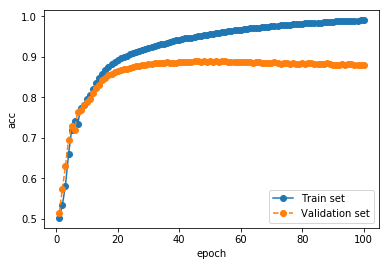

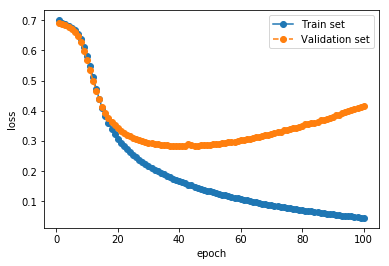

In [8]:
from farhad_DL.utils import plot_training_summary
plot_training_summary(summary,time_summary)

In [9]:
results = model.evaluate(test_data, test_labels)
print(results)

ValueError: setting an array element with a sequence.

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          1600000   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 34        
Total params: 1,600,306
Trainable params: 1,600,306
Non-trainable params: 0
_________________________________________________________________


<div style="width:100%;height:70px;border: 4px solid #179871;background-color:#179871;color:white;text-align:center;border-radius: 25px;padding:3px">

<header class="w3-container w3-pink w3-teal  w3-round-large w3-center" style="width:100%;height:80px;">
  <h1> PLus Theory:</h1>
</header>

<div> 

# Prepare the data

the arrays of integers—must be converted to tensors before fed into the neural network. This conversion can be done a couple of ways:
1. Encode text values to dummy variables (i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue) <br>
(used farhad_DL.utility.encode_text_dummy(df, target))
2. pad the arrays so they all have the same length, then create an integer tensor of shape max_features * num_sample. We can use an embedding layer capable of handling this shape as the first layer in our network.<br>
(used keras.preprocessing.sequence.pad_sequences )

# pad_sequence

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
https://keras.io/preprocessing/sequence/
</div>


In [ ]:
keras.preprocessing.sequence.pad_sequences(sequences, 
                                           maxlen=None, 
                                           dtype='int32', 
                                           padding='pre', 
                                           truncating='pre', 
                                           value=0.0)


- <b>padding:</b>  String, 'pre' or 'post': pad either before or after each sequen.
- <b>truncating:</b> String, 'pre' or 'post': remove values from sequences larger than  maxlen, either at the beginning or at the end of the sequences.
- <b>value:</b> Float or String, padding value.

# GlobalAveragePooling1D